In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np    

In [2]:
from shapely import geometry
from shapely.ops import unary_union
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

In [3]:
hMap = pd.read_csv('data/hcomp.map',header=None)
vMap = pd.read_csv('data/vcomp.map',header=None)

hMap.columns = ['xlow','ylow','xhigh','yhigh','hor_comp']
vMap.columns = ['xlow','ylow','xhigh','yhigh','ver_comp']


##filtering out the rows whose compressibility (col4) is more than 50%
canCompress_hMap = hMap[hMap['hor_comp'] <= -0.5]
canCompress_vMap = vMap[vMap['ver_comp'] <= -0.5]

canCompress_hMap['xlow']= canCompress_hMap['xlow'].astype(float)
canCompress_vMap['xlow']= canCompress_vMap['xlow'].astype(float)



canCompress_vMap.sort_values(['xlow','ylow','xhigh','yhigh'],inplace = True)
canCompress_hMap.sort_values(['xlow','ylow','xhigh','yhigh'], inplace = True)
#display(canCompress_vMap,canCompress_hMap)


canCompress_vMap['xDelta']=canCompress_vMap['xhigh'].astype(float)-canCompress_vMap['xlow'].astype(float)
canCompress_vMap['yDelta']=canCompress_vMap['yhigh'].astype(float)-canCompress_vMap['ylow'].astype(float)
canCompress_hMap['xDelta']=canCompress_hMap['xhigh'].astype(float)-canCompress_hMap['xlow'].astype(float)
canCompress_hMap['yDelta']=canCompress_hMap['yhigh'].astype(float)-canCompress_hMap['ylow'].astype(float)

#display(canCompress_vMap)


# find maximum value of a single column
min_vxlow = canCompress_vMap['xlow'].min();
max_vxhigh = canCompress_vMap['xhigh'].max();

min_vylow = canCompress_vMap['ylow'].min();
max_vyhigh = canCompress_vMap['yhigh'].max();
polygons = []

Total num of polygons Pre-Compression---->  40563


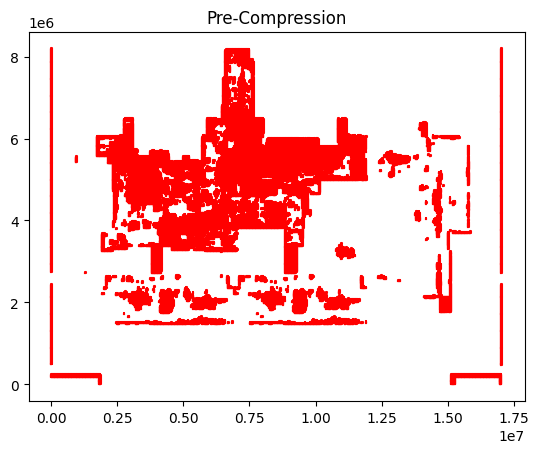

In [4]:
##plotting multiple polygons based on the co-ords extracted post compression
for ind in canCompress_vMap.index:
    p1 = geometry.Point(canCompress_vMap['xlow'][ind],canCompress_vMap['ylow'][ind])
    p2 = geometry.Point(canCompress_vMap['xlow'][ind]+canCompress_vMap['xDelta'][ind],canCompress_vMap['ylow'][ind])
    p3 = geometry.Point(canCompress_vMap['xlow'][ind]+canCompress_vMap['xDelta'][ind],canCompress_vMap['ylow'][ind]+canCompress_vMap['yDelta'][ind])
    p4 = geometry.Point(canCompress_vMap['xlow'][ind],canCompress_vMap['ylow'][ind]+canCompress_vMap['yDelta'][ind])
    points = [p1, p2, p3, p4, p1]
    poly = geometry.Polygon([[p.x, p.y] for p in points])
    polygons.append(poly)

print("Total num of polygons Pre-Compression----> ", len(polygons))
for ind in range(len(polygons)):
    x, y = polygons[ind].exterior.xy
    plt.plot(x, y, c="red")

plt.title("Pre-Compression")
plt.show()

###end of plotting code (post compression)

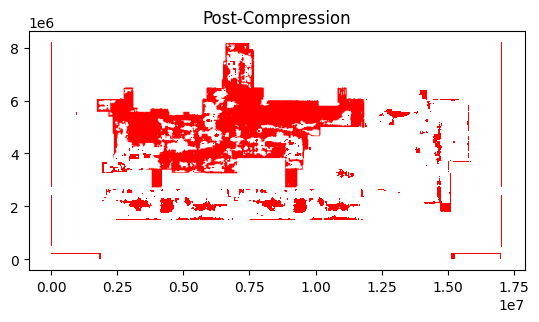

In [5]:
##union of polygons - Compression
union = gpd.GeoSeries(unary_union(polygons))
union.plot(color = 'red')
plt.title("Post-Compression")
plt.show()

In [17]:
##detracing coordinates to cross-verify the compression results

detraceDF = pd.DataFrame(columns= ['xlow','ylow','xhigh','yhigh'])
def detraceCoords(coordinates):
    global detraceDF
    x,y = coordinates
    row = {'xlow' : min(x) , 'ylow' : min(y) , 'xhigh' : max(x) , 'yhigh' : max(y)}
    ##append dictionary only if ignore_index=True 
    detraceDF = detraceDF.append(row,ignore_index=True)


##changing geoPandas series to pandas dataframe and then to numpy array
coord_arr = pd.DataFrame(union).to_numpy()
print(type(coord_arr[0][0]))
compressed_polygons = list(coord_arr[0])

print("Total num of polygons Post-Compression----> ", len(compressed_polygons))

for index in range(len(compressed_polygons)):
    ##to give x,y coordinates of the union polyon
    detraceCoords(compressed_polygons[index].exterior.xy)

    
display(detraceDF)

##saving the compressed co-ords into a file
np.savetxt(r'./vmap_compressed.map', detraceDF.values, fmt='%d',delimiter=',')

<class 'shapely.geometry.multipolygon.MultiPolygon'>
Total num of polygons Post-Compression---->  1


AttributeError: 'MultiPolygon' object has no attribute 'exterior'